# Function phasecorr

## Synopse

Computes the phase correlation of two images.

- **g = phasecorr(f,h)**
    - **OUTPUT**
        - **g**: Image. Phase correlation map.
    - **INPUT**
        - **f**: Image. n-dimensional.
        - **h**: Image. n-dimensional.

## Description

Computes the phase correlation of two n-dimensional images. Notice that the input images must have
the same dimension and size. The output is an image with same dimension and size of the input image.
This output image is a phase correlation map were the point of maximum value corresponds to the
translation between the input images.
        

In [7]:
import numpy as np
def phasecorr(f,h):
    F = np.fft.fftn(f)
    H = np.fft.fftn(h)
    T = F * np.conjugate(H)
    R = T/np.abs(T)
    g = np.fft.ifftn(R)
    return g.real

## Examples

In [8]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    %matplotlib inline
    import matplotlib.image as mpimg


### Example 1

Show that the point of maximum correlation for two equal images is the origin.
        
    

max at:0: 169


""
input image

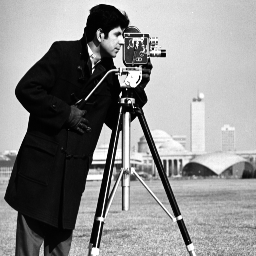

""
Correlation peak at 0 with 169

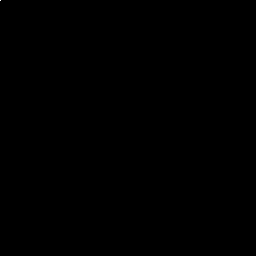

In [5]:
if testing:
    # 2D example
    f1 = mpimg.imread("../data/cameraman.tif")
    g1 = ia.phasecorr(f1,f1)
    i = np.argmax(g1.ravel)
    v = f1.flat[i]
    print('max at:%d: %d' % (i,v))

    ia.adshow(ia.normalize(f1), "input image")
    ia.adshow(ia.normalize(g1), "Correlation peak at %d with %d" % (i,v))

### Exemplo 3

Show how to perform Template Matching using phase correlation.

""
Original 2D image - Cameraman

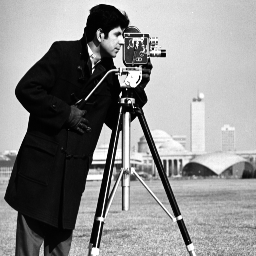

""
2D Template

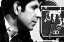

""
"Cameraman - Correlation peak: (48, 115)"

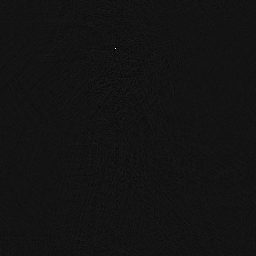

""
Template translated mixed with original image

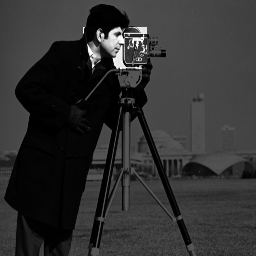

In [6]:
if testing:
    # 2D example
    w1 = f1[27:69,83:147]
    
    h3 = np.zeros_like(f1)
    h3[:w1.shape[0],:w1.shape[1]] = w1
    h3 = ia.ptrans(h3, - np.array(w1.shape, dtype=int)//2)
    
    g9 = ia.phasecorr(f1,h3)
    
    p3 = np.unravel_index(np.argmax(g9), g9.shape)
    g11 = ia.ptrans(h3,p3)
    
    ia.adshow(ia.normalize(f1), "Original 2D image - Cameraman")
    ia.adshow(ia.normalize(w1), "2D Template")
    ia.adshow(ia.normalize(g9), "Cameraman - Correlation peak: %s"%str(p3))
    ia.adshow(ia.normalize((g11*2.+f1)/3.), "Template translated mixed with original image")

## Equation

We calculate the discrete Fourier transform of the input images $f$ and $h$:

$$    F = \mathcal{F}(f); $$

$$    H = \mathcal{F}(h). $$

Next, the following equation compute $R$

$$    R = \dfrac{F H^*}{|F H^*|}. $$
    
Finally, the result is given by applying the inverse discrete Fourier transform to $R$

$$    g = \mathcal{F}^{-1}(R). $$

## See also

- `ia636:iadft iadft` -- Discrete Fourier Transform.
- `ia636:iaidft iaidft` -- Inverse Discrete Fourier Transform.
- `ia636:iaptrans iaptrans` -- Periodic translation.
- `ia636:iamosaic iamosaic` -- Creates a mosaic of images from the input volume (3D).
- `ia636:iacorrdemo iacorrdemo` -- Illustrate the Template Matching technique.

## Contributions

- André Luis da Costa, 1st semester 2011